<a href="https://colab.research.google.com/github/BimsaraS99/Bank-Customer-Action-Prediction-Binary-Classification/blob/main/Customer_Exit__Prediction_version_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [373]:
dataset_path = "train.csv"
dataset = pd.read_csv(dataset_path)
dataset.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
131116,131116,15575759,Tsai,624,France,Male,35.0,7,0.00,1,1.0,0.0,4791.80,0
134423,134423,15807312,Hsia,575,France,Male,30.0,4,0.00,2,0.0,1.0,64038.34,0
82645,82645,15784788,Chu,687,France,Male,47.0,2,148045.59,1,1.0,1.0,142223.67,0
21109,21109,15572051,Teng,639,Germany,Male,38.0,3,103871.30,1,1.0,0.0,139994.34,1
125692,125692,15731829,Rowley,667,France,Female,55.0,9,0.00,1,1.0,0.0,190806.36,1


In [374]:
print("Number of Rows and Columns:")
print(dataset.shape)

print("\nColumn Names:")
print(dataset.columns)

print("\nData Types:")
print(dataset.dtypes)

print("\nSummary Statistics:")
print(dataset.describe())

print("\nFirst Few Rows:")
print(dataset.head())

Number of Rows and Columns:
(165034, 14)

Column Names:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Data Types:
id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

Summary Statistics:
                id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.8

In [375]:
print("\nData Types:")
print(dataset.dtypes)


Data Types:
id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [376]:
columns_to_remove = ['id', 'CustomerId', 'Surname']
dataset.drop(columns=columns_to_remove, inplace=True)
dataset.dropna(inplace=True)

In [377]:
dataset.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
80660,605,Germany,Male,47.0,3,121284.42,1,1.0,0.0,166471.02,1
107416,699,France,Male,31.0,6,0.00,2,1.0,0.0,92702.00,0
158607,756,France,Male,34.0,6,106192.10,1,1.0,0.0,149575.59,0
142750,683,France,Male,39.0,8,0.00,2,1.0,1.0,149599.62,0
130727,703,France,Female,43.0,4,145984.47,1,1.0,0.0,164768.63,0


In [378]:
print(dataset.shape)

(165034, 11)


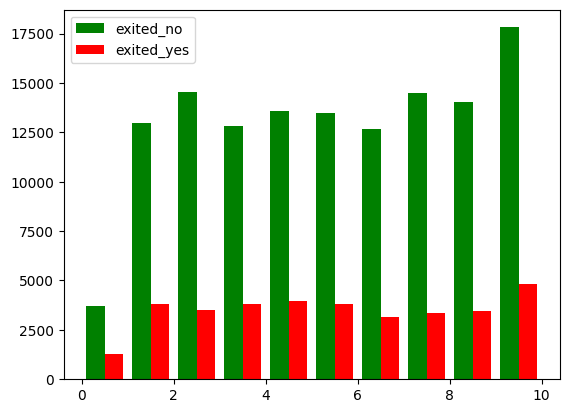

In [379]:
tenure_exited_0 = dataset[dataset.Exited == 0].Tenure
tenure_exited_1 = dataset[dataset.Exited == 1].Tenure

plt.hist([tenure_exited_0, tenure_exited_1], color=['green', 'red'], label=['exited_no', 'exited_yes'])
plt.legend()

Text(0, 0.5, 'Exited')

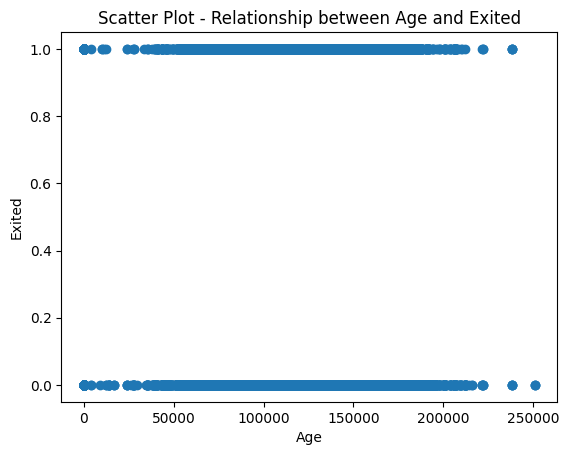

In [380]:
x = dataset['Balance']
y = dataset['Exited']

plt.scatter(x, y)

plt.title('Scatter Plot - Relationship between Age and Exited')
plt.xlabel('Age')
plt.ylabel('Exited')

In [381]:
print(dataset.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [382]:
print(dataset['Tenure'].max())
print(len(dataset[dataset.Exited==1]))
print(len(dataset[dataset.Exited==0]))

10
34921
130113


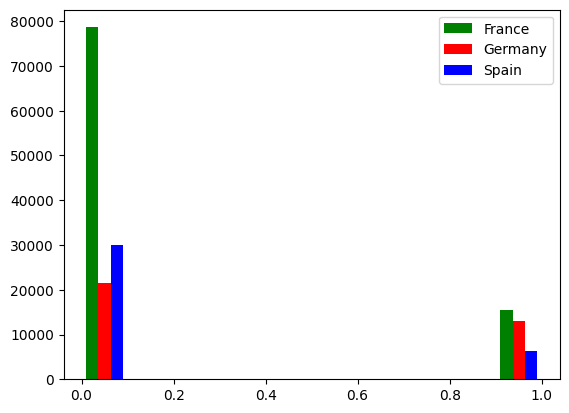

In [383]:
France_ = dataset[dataset.Geography == 'France'].Exited
Germany_ = dataset[dataset.Geography == 'Germany'].Exited
Spain_ = dataset[dataset.Geography == 'Spain'].Exited

plt.hist([France_, Germany_, Spain_], color=['green', 'red', 'blue'], label=['France', 'Germany', 'Spain'])
plt.legend()

In [384]:
for column in dataset:
  if dataset[column].dtypes == 'object':
    print(f'{column}: {dataset[column].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Male' 'Female']


In [385]:
dataset.shape

(165034, 11)

In [386]:
from sklearn.preprocessing import LabelEncoder

print(dataset)
print("\n")

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

print(dataset.dtypes)
print(dataset)

        CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France    Male  33.0       3       0.00              2   
1               627    France    Male  33.0       1       0.00              2   
2               678    France    Male  40.0      10       0.00              2   
3               581    France    Male  34.0       2  148882.54              1   
4               716     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain  Female  33.0       2       0.00              1   
165030          792    France    Male  35.0       3       0.00              1   
165031          565    France    Male  31.0       5       0.00              1   
165032          554     Spain  Female  30.0       7  161533.00              1   
165033          850    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActive

In [387]:
dataset_new = pd.get_dummies(dataset, columns=['Geography'])
dataset_new.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [388]:
dataset_new.sample(100)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
128950,535,1,25.0,5,0.00,1,0.0,1.0,74898.80,0,0,0,1
151684,585,0,37.0,7,0.00,2,1.0,1.0,59297.21,0,1,0,0
138945,628,0,45.0,9,0.00,3,1.0,0.0,34857.46,1,0,0,1
140203,565,1,33.0,8,130368.31,2,0.0,1.0,105642.43,0,0,1,0
11409,735,1,26.0,7,114450.32,1,1.0,1.0,14081.64,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,724,0,62.0,4,0.00,1,1.0,1.0,179913.54,1,1,0,0
36607,525,0,25.0,5,0.00,2,1.0,0.0,89566.64,0,1,0,0
142156,682,1,39.0,10,113873.34,1,1.0,0.0,147545.65,0,1,0,0
2865,701,1,29.0,1,103421.32,1,1.0,1.0,76304.73,0,0,0,1


In [389]:
dataset_new.dtypes

CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [390]:
for column_name in dataset_new.columns:
    unique_values = dataset_new[column_name].unique()
    print(f"Unique values in '{column_name}': {unique_values}")

Unique values in 'CreditScore': [668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 821 822 557 689 521
 604 628 568 597 556 449 717 713 536 657 452 719 564 484 816 825 512 531
 818 745 527 774 738 547 708 603 725 477 680 443 562 580 729 710 574 447
 497 656 550 766 728 653 537 609 704 772 781 697 428 757 666 522 453 643
 612 501 585 735 51

In [391]:
column_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_new[column_to_scale] = scaler.fit_transform(dataset_new[column_to_scale])

In [392]:
dataset_new.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
32648,0.422,0,0.229730,0.7,0.533556,0.000000,1.0,0.0,0.136386,0,0,0,1
99022,0.526,0,0.283784,0.8,0.600950,0.333333,1.0,1.0,0.716796,0,0,1,0
48567,0.468,0,0.270270,0.8,0.494122,0.333333,0.0,0.0,0.769812,0,0,1,0
164893,0.736,0,0.243243,0.3,0.000000,0.333333,1.0,1.0,0.709124,0,1,0,0
102020,0.574,1,0.337838,0.8,0.000000,0.000000,1.0,0.0,0.060733,0,1,0,0


In [393]:
for column_name in dataset_new.columns:
    min_value = dataset_new[column_name].min()
    max_value = dataset_new[column_name].max()
    print(f"Column '{column_name}': Min = {min_value}, Max = {max_value}")

Column 'CreditScore': Min = 0.0, Max = 0.9999999999999999
Column 'Gender': Min = 0, Max = 1
Column 'Age': Min = 0.0, Max = 1.0000000000000002
Column 'Tenure': Min = 0.0, Max = 1.0
Column 'Balance': Min = 0.0, Max = 1.0
Column 'NumOfProducts': Min = 0.0, Max = 1.0
Column 'HasCrCard': Min = 0.0, Max = 1.0
Column 'IsActiveMember': Min = 0.0, Max = 1.0
Column 'EstimatedSalary': Min = 0.0, Max = 1.0
Column 'Exited': Min = 0, Max = 1
Column 'Geography_France': Min = 0, Max = 1
Column 'Geography_Germany': Min = 0, Max = 1
Column 'Geography_Spain': Min = 0, Max = 1


In [394]:
X = dataset_new.drop('Exited', axis='columns')
y = dataset_new['Exited']

In [395]:
print(X.shape)
print(y.shape)

(165034, 12)
(165034,)


In [396]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64


In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [398]:
X_test.shape

(1651, 12)

In [399]:
y_test.shape

(1651,)

In [400]:
X_train.shape

(163383, 12)

In [401]:
y_train.shape

(163383,)

In [402]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
108736,0.656,0,0.148649,0.3,0.540205,0.333333,1.0,1.0,0.912673,0,1,0
155723,0.426,0,0.121622,0.9,0.000000,0.333333,0.0,1.0,0.314302,0,0,1
28173,0.488,0,0.256757,0.7,0.000000,0.333333,1.0,0.0,0.858557,1,0,0
73345,0.564,1,0.270270,0.1,0.480670,0.000000,1.0,0.0,0.464071,0,0,1
1109,0.596,1,0.337838,0.8,0.000000,0.333333,1.0,0.0,0.519840,1,0,0
133534,0.378,0,0.175676,1.0,0.612873,0.333333,0.0,1.0,0.883419,1,0,0
5860,0.716,1,0.283784,0.5,0.365060,0.333333,1.0,0.0,0.739127,1,0,0
37712,0.662,1,0.270270,0.7,0.000000,0.333333,1.0,1.0,0.908501,1,0,0
67832,0.658,0,0.351351,0.3,0.473271,0.333333,1.0,0.0,0.684068,1,0,0
96179,0.310,0,0.337838,0.1,0.000000,0.000000,1.0,0.0,0.809205,0,0,1


In [403]:
len(X_train.columns)

12

In [404]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [405]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
5106/5106 [==============================] - 11s 2ms/step - loss: 0.3902 - accuracy: 0.8326
Epoch 2/50
5106/5106 [==============================] - 11s 2ms/step - loss: 0.3503 - accuracy: 0.8501
Epoch 3/50
5106/5106 [==============================] - 12s 2ms/step - loss: 0.3389 - accuracy: 0.8590
Epoch 4/50
5106/5106 [==============================] - 10s 2ms/step - loss: 0.3342 - accuracy: 0.8604
Epoch 5/50
5106/5106 [==============================] - 11s 2ms/step - loss: 0.3317 - accuracy: 0.8613
Epoch 6/50
5106/5106 [==============================] - 11s 2ms/step - loss: 0.3296 - accuracy: 0.8623
Epoch 7/50
5106/5106 [==============================] - 11s 2ms/step - loss: 0.3283 - accuracy: 0.8630
Epoch 8/50
5106/5106 [==============================] - 10s 2ms/step - loss: 0.3271 - accuracy: 0.8640
Epoch 9/50
5106/5106 [==============================] - 12s 2ms/step - loss: 0.3260 - accuracy: 0.8640
Epoch 10/50
5106/5106 [==============================] - 13s 2ms/step - l

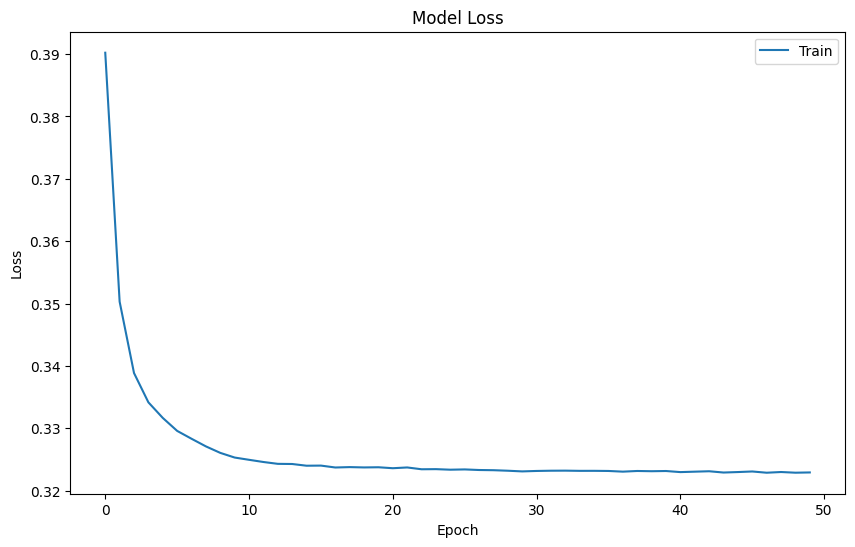

In [407]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

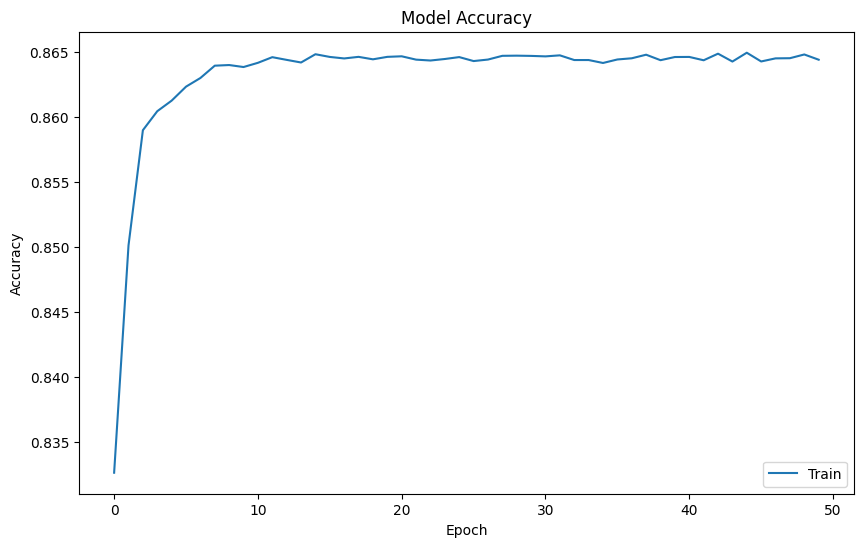

In [409]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

In [410]:
model.evaluate(X_test, y_test)

52/52 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8680


[0.3255135118961334, 0.8679587841033936]

In [411]:
y_pred_tf = model.predict(X_test)

52/52 [==============================] - 0s 1ms/step


In [412]:
y_pred_tf

array([[0.12947439],
       [0.01531167],
       [0.8454151 ],
       ...,
       [0.01652294],
       [0.13125207],
       [0.01475025]], dtype=float32)

In [413]:
model.save('tf_model')

# ***Predicting Seperate Dataset***

In [414]:
testset_path = "test.csv"
testset = pd.read_csv(testset_path)
testset.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
53568,218602,15716608,Tien,591,France,Female,42.0,8,0.00,2,1.0,0.0,124486.88
46134,211168,15701524,Ting,709,France,Male,34.0,0,0.00,2,1.0,1.0,46811.77
70233,235267,15791141,Nkemdirim,591,Germany,Female,35.0,5,133496.08,1,1.0,1.0,168882.06
17835,182869,15694819,Macleod,616,Germany,Male,36.0,3,113882.77,1,1.0,1.0,109153.04
73733,238767,15744582,Randall,680,France,Female,24.0,10,0.00,2,1.0,1.0,154971.63


In [415]:
print("Number of Rows and Columns:")
print(testset.shape)

Number of Rows and Columns:
(110023, 13)


In [416]:
id_column = testset['id']

columns_to_remove = ['id', 'CustomerId', 'Surname']
testset.drop(columns=columns_to_remove, inplace=True)
testset.dropna(inplace=True)

In [ ]:
id_column.shape

In [ ]:
id_column

In [419]:
testset.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
49053,748,Spain,Male,58.0,2,0.0,1,1.0,1.0,183592.74
77133,630,France,Male,62.0,5,0.0,2,0.0,0.0,42028.16
96725,619,Spain,Male,38.0,2,0.0,2,1.0,1.0,147797.54
56457,631,Spain,Male,35.0,2,0.0,2,0.0,1.0,13210.56
32773,554,France,Male,43.0,5,0.0,1,1.0,0.0,184350.79


In [420]:
print("Number of Rows and Columns:")
print(testset.shape)

Number of Rows and Columns:
(110023, 10)


In [421]:
for column in testset:
  if testset[column].dtypes == 'object':
    print(f'{column}: {testset[column].unique()}')

Geography: ['France' 'Germany' 'Spain']
Gender: ['Female' 'Male']


In [422]:
from sklearn.preprocessing import LabelEncoder

print(testset)
print("\n")

label_encoder = LabelEncoder()
testset['Gender'] = label_encoder.fit_transform(testset['Gender'])

print(testset.dtypes)
print(testset)

        CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               586    France  Female  23.0       2       0.00              2   
1               683    France  Female  46.0       2       0.00              1   
2               656    France  Female  34.0       7       0.00              2   
3               681    France    Male  36.0       8       0.00              1   
4               752   Germany    Male  38.0      10  121263.62              1   
...             ...       ...     ...   ...     ...        ...            ...   
110018          570     Spain    Male  29.0       7  116099.82              1   
110019          575    France  Female  36.0       4  178032.53              1   
110020          712    France    Male  31.0       2       0.00              2   
110021          709    France  Female  32.0       3       0.00              1   
110022          621    France  Female  37.0       7   87848.39              1   

        HasCrCard  IsActive

In [423]:
testset = pd.get_dummies(testset, columns=['Geography'])
testset.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [424]:
testset.dtypes

CreditScore            int64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [425]:
testset.shape

(110023, 12)

In [426]:
column_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
testset[column_to_scale] = scaler.fit_transform(testset[column_to_scale])

In [427]:
for column_name in testset.columns:
    min_value = testset[column_name].min()
    max_value = testset[column_name].max()
    print(f"Column '{column_name}': Min = {min_value}, Max = {max_value}")

Column 'CreditScore': Min = 0.0, Max = 0.9999999999999999
Column 'Gender': Min = 0, Max = 1
Column 'Age': Min = 0.0, Max = 1.0000000000000002
Column 'Tenure': Min = 0.0, Max = 1.0
Column 'Balance': Min = 0.0, Max = 1.0
Column 'NumOfProducts': Min = 0.0, Max = 1.0
Column 'HasCrCard': Min = 0.0, Max = 1.0
Column 'IsActiveMember': Min = 0.0, Max = 1.0
Column 'EstimatedSalary': Min = 0.0, Max = 1.0
Column 'Geography_France': Min = 0, Max = 1
Column 'Geography_Germany': Min = 0, Max = 1
Column 'Geography_Spain': Min = 0, Max = 1


In [428]:
X = testset.copy()

In [429]:
print(X.shape)

(110023, 12)


In [430]:
test_result = model.predict(X)

3439/3439 [==============================] - 5s 1ms/step


In [431]:
test_result.shape

(110023, 1)

In [432]:
test_result

array([[0.02297348],
       [0.8538654 ],
       [0.03210483],
       ...,
       [0.01700967],
       [0.14380185],
       [0.21446262]], dtype=float32)

In [433]:
import pandas as pd

result_df = pd.DataFrame({'id': id_column, 'Exited': test_result.flatten()})
result_df.to_csv('result.csv', index=False)

print(result_df.head())

       id    Exited
0  165034  0.022973
1  165035  0.853865
2  165036  0.032105
3  165037  0.307464
4  165038  0.392435


# **Final Accuracy = 0.88200**